In [1]:
from google.cloud import bigquery # modulo para interactuar con la API y el service account del DW
import pandas as pd
import numpy as np
from plotnine import *
%matplotlib inline
# un bonita funcion para hacer los querys 
def query_BQ(query_string):
    client = bigquery.Client() # inicializamos el cliente, pero antes se debe de fijar la variable de entorno 
    query_job = client.query(query_string)
    results = query_job.result().to_dataframe()  # Waits for job to complete and cast to pandas dataframe
    return(results)

In [2]:
from sklearn.preprocessing import scale
from h2o.automl import H2OAutoML
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators import H2OXGBoostEstimator
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2ONaiveBayesEstimator
from sklearn.metrics import confusion_matrix
from google.cloud import bigquery # modulo para interactuar con la API y el service account del DW
import pandas as pd
import numpy as np
import h2o
import datetime
inicio = datetime.datetime.now()

In [3]:
query = '''
SELECT distinct user_id,
max(baby_age) as baby_age,
#max(days_to_convert) as days_to_convert, /*Use only for analysis*/
max(days_to_take_FT) as days_to_take_FT,
max(days_in_app) as days_in_app,
max(device) as device,#
max(adjust_network) as adjust_network,
max(android_app_version) as android_app_version,
max(android_lib_version) as android_lib_version /*.002 null class*/,
max(screen_width) as screenwidth,
max(timezone) as timezone,
max(user_relationship) as user_relationship,
max(user_role) as user_role,
#max(initial_assessment_completed) as initial_assessment_completed,
#max(FT_start) as FT_start,
#max(FT_conversion) as FT_conversion,
#mp_country,
y,
sum(case when video = "Completed" then 1 else 0 end) as Video_Completed,
sum(case when name ="OpenApp" then 1 else 0 end) as OpenApp,
sum(case when name ="LogOut" then 1 else 0 end) as LogOut,
sum(case when name ="S_DAPNewSkills" then 1 else 0 end) as S_DAPNewSkills,
sum(case when name ="AB_TEST" then 1 else 0 end) as AB_TEST,
sum(case when name ="S_SPHome" then 1 else 0 end) as S_SPHome,
sum(case when name ="S_SPLogin" then 1 else 0 end) as S_SPLogin,
sum(case when name ="LogIn" then 1 else 0 end) as LogIn,
sum(case when name ="SPForgotPass" then 1 else 0 end) as SPForgotPass,
sum(case when name ="S_SPSignup" then 1 else 0 end) as S_SPSignup,
sum(case when name ="SignUp" then 1 else 0 end) as SignUp,
sum(case when name ="OBCreateUser" then 1 else 0 end) as OBCreateUser,
sum(case when name ="S_OBBabyName" then 1 else 0 end) as S_OBBabyName,
sum(case when name ="OBCreateTwins" then 1 else 0 end) as OBCreateTwins,
sum(case when name ="S_OBPremature" then 1 else 0 end) as S_OBPremature,
sum(case when name ="Paywall_Dismiss" then 1 else 0 end) as Paywall_Dismiss,
sum(case when name ="S_Paywall_Soft" then 1 else 0 end) as S_Paywall_Soft,
sum(case when name ="S_IAIntro" then 1 else 0 end) as S_IAIntro,
sum(case when name ="IAStraightToActivities" then 1 else 0 end) as IAStraightToActivities,
sum(case when name ="IAStartAssessment" then 1 else 0 end) as IAStartAssessment,
sum(case when name ="IASkipAssessment" then 1 else 0 end) as IASkipAssessment,
sum(case when name ="MasterSkill" then 1 else 0 end) as MasterSkill,
sum(case when name ="IAFinishSkill" then 1 else 0 end) as IAFinishSkill,
sum(case when name ="S_HealthInterest" then 1 else 0 end) as S_HealthInterest,
sum(case when name ="S_IASetReminder" then 1 else 0 end) as S_IASetReminder,
sum(case when name ="IAReminder" then 1 else 0 end) as IAReminder,
sum(case when name ="S_IA_Answer_Skill" then 1 else 0 end) as S_IA_Answer_Skill,
sum(case when name ="DAPChangeActivity" then 1 else 0 end) as DAPChangeActivity,
sum(case when name ="S_DAPPastPlansPremium" then 1 else 0 end) as S_DAPPastPlansPremium,
sum(case when name ="DAPActivityCompleted" then 1 else 0 end) as DAPActivityCompleted,
sum(case when name ="S_DAPMaterials" then 1 else 0 end) as S_DAPMaterials,
sum(case when name ="MilestonesUpdate" then 1 else 0 end) as MilestonesUpdate,
sum(case when name ="ArticleView" then 1 else 0 end) as ArticleView,
sum(case when name ="SlideshowView" then 1 else 0 end) as SlideshowView,
sum(case when name ="ActivityView" then 1 else 0 end) as ActivityView,
sum(case when name ="ClickInDAP" then 1 else 0 end) as ClickInDAP,
sum(case when name ="RateActivityDAP" then 1 else 0 end) as RateActivityDAP,
sum(case when name ="Feedback_RateActivity" then 1 else 0 end) as Feedback_RateActivity,
sum(case when name ="Dismiss_Feedback_RateActivity" then 1 else 0 end) as Dismiss_Feedback_RateActivity,
sum(case when name ="LifeSpent" then 1 else 0 end) as LifeSpent,
sum(case when name ="WhatchAd" then 1 else 0 end) as WhatchAd,
sum(case when name ="VideoPlayerActivity" then 1 else 0 end) as VideoPlayerActivity,
sum(case when name ="NPSSubmit" then 1 else 0 end) as NPSSubmit,
sum(case when name ="S_NPSScore" then 1 else 0 end) as S_NPSScore,
sum(case when name ="S_ProgressHome" then 1 else 0 end) as S_ProgressHome,
sum(case when name ="S_MenuFamilyHome" then 1 else 0 end) as S_MenuFamilyHome,
sum(case when name ="MenuHelp" then 1 else 0 end) as MenuHelp,
sum(case when name ="MenuMemberStats" then 1 else 0 end) as MenuMemberStats,
sum(case when name ="MenuFamilyInvite" then 1 else 0 end) as MenuFamilyInvite,
sum(case when name ="MenuChangeBirthday" then 1 else 0 end) as MenuChangeBirthday,
sum(case when name ="S_MenuEditBaby" then 1 else 0 end) as S_MenuEditBaby,
sum(case when name ="S_MenuUserProfile" then 1 else 0 end) as S_MenuUserProfile,
sum(case when name ="MenuFamilyDefault" then 1 else 0 end) as MenuFamilyDefault,
sum(case when name ="S_MenuFamilyProfile" then 1 else 0 end) as S_MenuFamilyProfile,
sum(case when name ="TAPCallToAction" then 1 else 0 end) as TAPCallToAction,
sum(case when name ="S_PremiumProcess" then 1 else 0 end) as S_PremiumProcess,
sum(case when name ="RestorePurchase" then 1 else 0 end) as RestorePurchase,
sum(case when name ="S_CATHome_P" then 1 else 0 end) as S_CATHome_P,
sum(case when name ="S_CATHome_F" then 1 else 0 end) as S_CATHome_F,
sum(case when name ="CATSearch" then 1 else 0 end) as CATSearch,
sum(case when name ="S_CATViewSkill" then 1 else 0 end) as S_CATViewSkill,
sum(case when name ="S_CollectionView" then 1 else 0 end) as S_CollectionView,
sum(case when name ="ViewAllCollections" then 1 else 0 end) as ViewAllCollections,
sum(case when name ="S_SearchEmptyState" then 1 else 0 end) as S_SearchEmptyState,
sum(case when name ="ResetSearch" then 1 else 0 end) as ResetSearch,
sum(case when name ="S_MilestonesHome" then 1 else 0 end) as S_MilestonesHome,
sum(case when name ="SkillsViewAllSkills" then 1 else 0 end) as SkillsViewAllSkills,
sum(case when name ="S_PromoCode" then 1 else 0 end) as S_PromoCode,
sum(case when name ="PromoCodeRedeem" then 1 else 0 end) as PromoCodeRedeem,
sum(case when name ="S_FeedHome" then 1 else 0 end) as S_FeedHome,
sum(case when name ="InviteClassrooms" then 1 else 0 end) as InviteClassrooms,
sum(case when name ="shown" then 1 else 0 end) as shown,
sum(case when name ="clicked" then 1 else 0 end) as clicked,
sum(case when name ="dismissed" then 1 else 0 end) as dismissed
from
(
SELECT u.id as user_id,
date_diff(current_date('UTC'),date(b.birthday), month) as baby_age,
#timestamp_diff(timestamp(current_date('UTC')),b.birthday, day) as baby_ageD,
timestamp_diff(ued.trial_start ,u.created_at, day) as days_to_take_FT,/*Use only for analysis*/
timestamp_diff(timestamp(current_date('UTC')) ,u.created_at, day) as days_in_app,/*Use only for analysis*/

#timestamp_diff(ued.premium_conversion_date,u.created_at, day) as days_to_convert,/*Use only for analysis*/
ev.name, ev.screen_height,ev.screen_width,ev.properties,
u.mp_country,
u.adjust_network,
IF(ev.name= "VideoPlayerActivity" and JSON_EXTRACT(ev.properties, "$.video_completed")="true", "Completed", "Not Completed") as Video,
if (ev.device is null, 'NULL', ev.device) as device,
/*0.01915nulls */
if (p.android_app_version is null, 'NULL', android_app_version) as android_app_version, /*all related to android will be categoric 0.001 nulls*/
if( p.android_app_version_code is null, 'NULL', cast( android_app_version_code as string) ) as android_app_version_code,
if( android_brand is null, 'NULL', android_brand) as android_brand,
if(android_lib_version is null, 'NULL', android_lib_version)  as android_lib_version,
if(android_manufacturer is null, 'NULL', android_manufacturer) as android_manufacturer,
if(android_os_version is null, 'NULL', android_os_version) as android_os_version,
if(ued.premium_conversion_date is not null, 'Premium', 'Freemium') as y,
if(p.initial_assessment_completed is  null or initial_assessment_completed="NO", 0, 1) as initial_assessment_completed,
p.timezone,
if(p.user_relationship is null, 'NULL', user_relationship) as user_relationship,
if(p.user_role is null, 'NULL', user_role) as user_role,
if(ued.trial_start is not null, 1, 0) as FT_start,
if(ued.trial_converted is not null , 1, 0) as FT_conversion
FROM `celtic-music-240111.mixpanel.event` as ev
left join mixpanel.people as p
on p.distinct_id = ev.distinct_id
inner join aws_kinedu_app.users as u
on u.email = p.user_email
inner join aws_kinedu_app.user_extra_data as ued
on u.id = ued.user_id
left join `celtic-music-240111.aws_kinedu_app.babies` as b
on  u.id =b.author_id
where timestamp_MILLIS(ev.mp_processing_time_ms) >= '2020-01-01' and  timestamp_diff(timestamp_MILLIS(ev.mp_processing_time_ms) , ued.trial_start, day) <= 3 /*only the first day events*/
and u.mp_os='Android'
#and u.adjust_network in ('Facebook', 'SMARTLY - Facebook', 'Facebook Installs', 'Instagram', 'SMARTLY - Instagram')
and (ued.premium_conversion_date not between '2020-03-16' and '2020-04-15' or premium_conversion_date is null)  /*null for add freemium users*/
and (timestamp_MILLIS(ev.mp_processing_time_ms) not between '2020-03-16' and '2020-04-15') #covid
and (u.created_at not between '2020-03-16' and '2020-04-15') #covid
and (u.created_at >='2020-01-01')
)
where mp_country ='US'
and days_to_take_FT>=0 and days_to_take_FT<=3
group by user_id,y, mp_country
'''

In [4]:
import datetime
start = datetime.datetime.now()
raw_data = query_BQ(query)
end = datetime.datetime.now()
print(end - start)


0:00:10.851373


In [5]:
max(raw_data['user_id'])  #ÚLTIMO usuario que se utilizo para entrenar el modelo 

6413285

In [6]:
raw_data['y'].value_counts()

Premium     1356
Freemium    1187
Name: y, dtype: int64

In [7]:
raw_data.shape

(2543, 87)

In [8]:
raw_data = raw_data.drop_duplicates()
raw_data = raw_data.dropna()
raw_data.shape

(2536, 87)

In [9]:
raw_data.describe()

user_id     baby_age  days_to_take_FT  days_in_app  screenwidth  \
count  2.536000e+03  2536.000000      2536.000000  2536.000000  2536.000000   
mean   5.576674e+06    12.352524         0.043770   127.413249  1053.792587   
std    5.689514e+05    14.630179         0.299994    68.684101   207.914661   
min    4.444424e+06     0.000000         0.000000     0.000000   480.000000   
25%    4.990646e+06     5.000000         0.000000    76.000000  1080.000000   
50%    5.696130e+06     8.000000         0.000000   125.000000  1080.000000   
75%    6.012474e+06    12.000000         0.000000   196.000000  1080.000000   
max    6.413285e+06   196.000000         3.000000   252.000000  1920.000000   

       Video_Completed      OpenApp       LogOut  S_DAPNewSkills      AB_TEST  \
count      2536.000000  2536.000000  2536.000000     2536.000000  2536.000000   
mean          0.339511     5.286278     0.000394        0.045347     0.358044   
std           1.294607     5.137101     0.019858        0.260318     1.010574   
min           0.000000     1.000000     0.000000        0.000000     0.000000   
25%           0.000000     3.000000     0.000000        0.000000     0.000000   
50%           0.000000     4.000000     0.000000        0.000000     0.000000   
75%           0.000000     6.000000     0.000000        0.000000     0.000000   
max          16.000000    84.000000     1.000000        4.000000    23.000000   

          ...       ResetSearch  S_MilestonesHome  SkillsViewAllSkills  \
count     ...       2536.000000       2536.000000          2536.000000   
mean      ...          0.000394          1.402208             0.328076   
std       ...          0.019858          5.712982             1.590782   
min       ...          0.000000          0.000000             0.000000   
25%       ...          0.000000          0.000000             0.000000   
50%       ...          0.000000          0.000000             0.000000   
75%       ...          0.000000          0.000000             0.000000   
max       ...          1.000000        148.000000            24.000000   

       S_PromoCode  PromoCodeRedeem   S_FeedHome  InviteClassrooms  \
count  2536.000000      2536.000000  2536.000000       2536.000000   
mean      0.023265         0.022082     0.344243          0.001577   
std       0.328542         0.210909     0.889668          0.062788   
min       0.000000         0.000000     0.000000          0.000000   
25%       0.000000         0.000000     0.000000          0.000000   
50%       0.000000         0.000000     0.000000          0.000000   
75%       0.000000         0.000000     0.000000          0.000000   
max       8.000000         4.000000    13.000000          3.000000   

             shown      clicked    dismissed  
count  2536.000000  2536.000000  2536.000000  
mean      3.027603     0.071372     0.065457  
std      10.242890     0.358653     0.366837  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       1.000000     0.000000     0.000000  
max     194.000000     6.000000     7.000000  

[8 rows x 79 columns]

In [10]:
del raw_data['user_id']

In [11]:
columns=list(raw_data[raw_data.describe().columns])
columns.append('y')

In [12]:
p_mean= raw_data[columns].groupby('y').mean().T
p_mean=p_mean[p_mean>0.0]
p_mean=p_mean.dropna()
p_mean

y                          Freemium      Premium
baby_age                  12.251269    12.440916
days_to_take_FT            0.029611     0.056130
days_in_app              125.484772   129.096750
screenwidth             1033.991540  1071.078287
Video_Completed            0.281726     0.389956
OpenApp                    4.677665     5.817578
S_DAPNewSkills             0.038917     0.050960
AB_TEST                    0.306261     0.403250
S_SPHome                   2.135364     2.184638
S_SPLogin                  0.046531     0.104136
LogIn                      0.958545     0.979321
SPForgotPass               0.005922     0.008124
SignUp                     1.098139     1.111521
OBCreateUser               1.098985     1.110044
S_OBBabyName               1.412014     1.466765
OBCreateTwins              0.028765     0.032496
S_OBPremature              0.143824     0.170606
Paywall_Dismiss            0.039763     0.039882
S_Paywall_Soft             2.494078     2.466027
S_IAIntro                  2.128596     2.149188
IAStraightToActivities     0.082910     0.121861
IAStartAssessment          1.151438     1.151403
IASkipAssessment           0.361252     0.350074
MasterSkill                0.157360     0.187592
IAFinishSkill             10.218274     9.627770
S_HealthInterest           0.922166     0.942393
S_IASetReminder            0.059222     0.050960
IAReminder                 0.027073     0.043575
S_IA_Answer_Skill          2.824027     2.474151
DAPChangeActivity          0.230964     0.215657
...                             ...          ...
NPSSubmit                  0.009306     0.040620
S_NPSScore                 0.035533     0.079764
S_ProgressHome             1.600677     2.206056
S_MenuFamilyHome           2.257191     2.592319
MenuHelp                   0.176819     0.044313
MenuMemberStats            0.264805     0.290990
MenuFamilyInvite           0.122673     0.289513
MenuChangeBirthday         0.036379     0.026588
S_MenuEditBaby             0.305415     0.302068
S_MenuUserProfile          0.690355     0.600443
MenuFamilyDefault          0.029611     0.019202
S_MenuFamilyProfile        0.483080     0.791728
TAPCallToAction            1.318951     1.311669
S_PremiumProcess           0.257191     0.404727
RestorePurchase            0.008460     0.007386
S_CATHome_P                1.368020     1.477105
S_CATHome_F                0.061760     0.098227
CATSearch                  0.016074     0.021418
S_CATViewSkill             0.089679     0.054653
S_CollectionView           0.284264     0.307976
ViewAllCollections         0.016920     0.019202
S_SearchEmptyState         0.001692     0.006647
S_MilestonesHome           1.218274     1.562777
SkillsViewAllSkills        0.355330     0.304284
S_PromoCode                0.018613     0.027326
PromoCodeRedeem            0.016920     0.026588
S_FeedHome                 0.345178     0.343427
shown                      2.478003     3.507386
clicked                    0.071066     0.071640
dismissed                  0.044839     0.083456

[73 rows x 2 columns]

In [13]:
numerics=list(p_mean.index)
numerics

['baby_age',
 'days_to_take_FT',
 'days_in_app',
 'screenwidth',
 'Video_Completed',
 'OpenApp',
 'S_DAPNewSkills',
 'AB_TEST',
 'S_SPHome',
 'S_SPLogin',
 'LogIn',
 'SPForgotPass',
 'SignUp',
 'OBCreateUser',
 'S_OBBabyName',
 'OBCreateTwins',
 'S_OBPremature',
 'Paywall_Dismiss',
 'S_Paywall_Soft',
 'S_IAIntro',
 'IAStraightToActivities',
 'IAStartAssessment',
 'IASkipAssessment',
 'MasterSkill',
 'IAFinishSkill',
 'S_HealthInterest',
 'S_IASetReminder',
 'IAReminder',
 'S_IA_Answer_Skill',
 'DAPChangeActivity',
 'S_DAPPastPlansPremium',
 'DAPActivityCompleted',
 'S_DAPMaterials',
 'MilestonesUpdate',
 'ArticleView',
 'SlideshowView',
 'ActivityView',
 'ClickInDAP',
 'RateActivityDAP',
 'Feedback_RateActivity',
 'Dismiss_Feedback_RateActivity',
 'LifeSpent',
 'VideoPlayerActivity',
 'NPSSubmit',
 'S_NPSScore',
 'S_ProgressHome',
 'S_MenuFamilyHome',
 'MenuHelp',
 'MenuMemberStats',
 'MenuFamilyInvite',
 'MenuChangeBirthday',
 'S_MenuEditBaby',
 'S_MenuUserProfile',
 'MenuFamilyDefaul

In [14]:
categorics = [ i for i in raw_data.columns if i not in raw_data.describe().columns]
categorics

['device',
 'adjust_network',
 'android_app_version',
 'android_lib_version',
 'timezone',
 'user_relationship',
 'user_role',
 'y']

In [15]:
raw_data[numerics].describe() #hay qe guardar la media y desviacion estandar de las variables numericas 

baby_age  days_to_take_FT  days_in_app  screenwidth  \
count  2536.000000      2536.000000  2536.000000  2536.000000   
mean     12.352524         0.043770   127.413249  1053.792587   
std      14.630179         0.299994    68.684101   207.914661   
min       0.000000         0.000000     0.000000   480.000000   
25%       5.000000         0.000000    76.000000  1080.000000   
50%       8.000000         0.000000   125.000000  1080.000000   
75%      12.000000         0.000000   196.000000  1080.000000   
max     196.000000         3.000000   252.000000  1920.000000   

       Video_Completed      OpenApp  S_DAPNewSkills      AB_TEST     S_SPHome  \
count      2536.000000  2536.000000     2536.000000  2536.000000  2536.000000   
mean          0.339511     5.286278        0.045347     0.358044     2.161672   
std           1.294607     5.137101        0.260318     1.010574     1.357820   
min           0.000000     1.000000        0.000000     0.000000     1.000000   
25%           0.000000     3.000000        0.000000     0.000000     2.000000   
50%           0.000000     4.000000        0.000000     0.000000     2.000000   
75%           0.000000     6.000000        0.000000     0.000000     2.000000   
max          16.000000    84.000000        4.000000    23.000000    28.000000   

         S_SPLogin     ...       ViewAllCollections  S_SearchEmptyState  \
count  2536.000000     ...              2536.000000         2536.000000   
mean      0.077287     ...                 0.018139            0.004338   
std       0.483598     ...                 0.169889            0.110499   
min       0.000000     ...                 0.000000            0.000000   
25%       0.000000     ...                 0.000000            0.000000   
50%       0.000000     ...                 0.000000            0.000000   
75%       0.000000     ...                 0.000000            0.000000   
max      10.000000     ...                 4.000000            4.000000   

       S_MilestonesHome  SkillsViewAllSkills  S_PromoCode  PromoCodeRedeem  \
count       2536.000000          2536.000000  2536.000000      2536.000000   
mean           1.402208             0.328076     0.023265         0.022082   
std            5.712982             1.590782     0.328542         0.210909   
min            0.000000             0.000000     0.000000         0.000000   
25%            0.000000             0.000000     0.000000         0.000000   
50%            0.000000             0.000000     0.000000         0.000000   
75%            0.000000             0.000000     0.000000         0.000000   
max          148.000000            24.000000     8.000000         4.000000   

        S_FeedHome        shown      clicked    dismissed  
count  2536.000000  2536.000000  2536.000000  2536.000000  
mean      0.344243     3.027603     0.071372     0.065457  
std       0.889668    10.242890     0.358653     0.366837  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000  
75%       0.000000     1.000000     0.000000     0.000000  
max      13.000000   194.000000     6.000000     7.000000  

[8 rows x 73 columns]

In [16]:
X = scale(raw_data[numerics])
X = pd.DataFrame(X)
X.columns = numerics
X2 = raw_data[categorics]

/root/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [17]:
print(X2.columns)
X.columns

Index(['device', 'adjust_network', 'android_app_version',
       'android_lib_version', 'timezone', 'user_relationship', 'user_role',
       'y'],
      dtype='object')


Index(['baby_age', 'days_to_take_FT', 'days_in_app', 'screenwidth',
       'Video_Completed', 'OpenApp', 'S_DAPNewSkills', 'AB_TEST', 'S_SPHome',
       'S_SPLogin', 'LogIn', 'SPForgotPass', 'SignUp', 'OBCreateUser',
       'S_OBBabyName', 'OBCreateTwins', 'S_OBPremature', 'Paywall_Dismiss',
       'S_Paywall_Soft', 'S_IAIntro', 'IAStraightToActivities',
       'IAStartAssessment', 'IASkipAssessment', 'MasterSkill', 'IAFinishSkill',
       'S_HealthInterest', 'S_IASetReminder', 'IAReminder',
       'S_IA_Answer_Skill', 'DAPChangeActivity', 'S_DAPPastPlansPremium',
       'DAPActivityCompleted', 'S_DAPMaterials', 'MilestonesUpdate',
       'ArticleView', 'SlideshowView', 'ActivityView', 'ClickInDAP',
       'RateActivityDAP', 'Feedback_RateActivity',
       'Dismiss_Feedback_RateActivity', 'LifeSpent', 'VideoPlayerActivity',
       'NPSSubmit', 'S_NPSScore', 'S_ProgressHome', 'S_MenuFamilyHome',
       'MenuHelp', 'MenuMemberStats', 'MenuFamilyInvite', 'MenuChangeBirthday',
       'S_Me

In [ ]:
X

In [18]:
#Prueba Xi   --Variables Númericas
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#M = pd.concat( [X2.reset_index(drop=True), X  ], axis = 1)
#X = X.iloc[:,1:104]
#X = M.iloc[:,5:104] 
y= raw_data['y']

In [19]:
bestfeatures = SelectKBest(score_func=chi2, k="all")
X= abs(X)
y
fit= bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(50,'Score'))
#fit = bestfeatures.fit(X,y)

                          Feature      Score
47                       MenuHelp  79.205777
43                      NPSSubmit  51.378306
49               MenuFamilyInvite  38.654413
9                       S_SPLogin  26.211435
44                     S_NPSScore  26.032649
31           DAPActivityCompleted  22.736526
72                      dismissed  18.648805
37                     ClickInDAP  17.209196
40  Dismiss_Feedback_RateActivity  16.565299
64             S_SearchEmptyState  16.168744
42            VideoPlayerActivity  15.991625
54            S_MenuFamilyProfile  15.646514
1                 days_to_take_FT  15.628021
34                    ArticleView  14.798110
30          S_DAPPastPlansPremium  14.698248
5                         OpenApp  14.318495
35                  SlideshowView  12.822189
39          Feedback_RateActivity  12.467755
36                   ActivityView  12.102710
45                 S_ProgressHome  10.141175
20         IAStraightToActivities   9.485578
70        

In [20]:
feat= featureScores.nlargest(20,'Score').Feature
feat=feat.tolist()
#feat= feat[1:]
feat

['MenuHelp',
 'NPSSubmit',
 'MenuFamilyInvite',
 'S_SPLogin',
 'S_NPSScore',
 'DAPActivityCompleted',
 'dismissed',
 'ClickInDAP',
 'Dismiss_Feedback_RateActivity',
 'S_SearchEmptyState',
 'VideoPlayerActivity',
 'S_MenuFamilyProfile',
 'days_to_take_FT',
 'ArticleView',
 'S_DAPPastPlansPremium',
 'OpenApp',
 'SlideshowView',
 'Feedback_RateActivity',
 'ActivityView',
 'S_ProgressHome']

/root/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[4.58541123e-02 4.42633266e-03 5.43939801e-02 2.32030523e-02
 1.01208038e-02 4.05858615e-02 7.14107647e-03 2.07307688e-02
 2.44671799e-02 6.16157865e-03 1.38604666e-02 9.25582990e-05
 3.10019566e-03 3.16161537e-03 1.64892675e-02 2.61692512e-03
 1.80758658e-02 3.32659483e-03 2.02350179e-02 1.93524167e-02
 7.72829009e-03 6.96646966e-03 1.74325581e-02 9.91553162e-03
 3.95671082e-02 1.32404551e-02 6.58827778e-03 3.56159502e-03
 1.76231531e-02 1.38200811e-02 1.85906045e-02 2.81363667e-02
 3.11474566e-02 2.61184242e-02 2.40342616e-02 3.81597900e-04
 4.94380667e-02 3.67253251e-03 3.38143145e-03 1.45835792e-02
 6.69915461e-03 1.63237493e-03 1.82281950e-02 2.62166885e-03
 4.76241578e-03 2.37672278e-02 2.61947772e-02 1.56309685e-02
 8.47105458e-03 1.59822268e-02 3.51575011e-03 1.27531013e-02
 1.90180462e-02 4.86467835e-04 1.51303368e-02 1.63243583e-02
 5.19921158e-03 8.37751564e-04 2.61876500e-02 3.97938281e-03
 1.76825278e-03 5.09546114e-03 1.06557048e-02 1.77915554e-03
 3.43102414e-04 1.883654

baby_age                  0.045854
days_to_take_FT           0.004426
days_in_app               0.054394
screenwidth               0.023203
Video_Completed           0.010121
OpenApp                   0.040586
S_DAPNewSkills            0.007141
AB_TEST                   0.020731
S_SPHome                  0.024467
S_SPLogin                 0.006162
LogIn                     0.013860
SPForgotPass              0.000093
SignUp                    0.003100
OBCreateUser              0.003162
S_OBBabyName              0.016489
OBCreateTwins             0.002617
S_OBPremature             0.018076
Paywall_Dismiss           0.003327
S_Paywall_Soft            0.020235
S_IAIntro                 0.019352
IAStraightToActivities    0.007728
IAStartAssessment         0.006966
IASkipAssessment          0.017433
MasterSkill               0.009916
IAFinishSkill             0.039567
S_HealthInterest          0.013240
S_IASetReminder           0.006588
IAReminder                0.003562
S_IA_Answer_Skill   

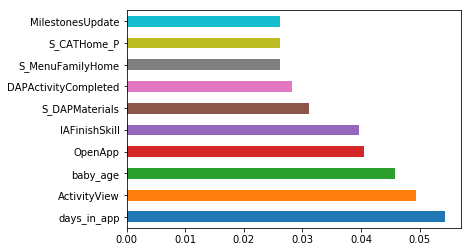

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
#plt.show()
feat_importances


In [ ]:
# Prueba Categoricas

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

In [23]:
def load_dataset(dfc):
    data = dfc
    dataset = data.values
    X = dataset[:, :-1]
    y = dataset[:,-1]
# format all fields as string
    X = X.astype(str)
    y = y.astype(str)
    return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X)  # antes X_train
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


In [24]:
X, y = load_dataset(X2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

Feature 0 device: nan
Feature 1 adjust_network: 10.538573
Feature 2 android_app_version: 516.313528
Feature 3 android_lib_version: 25.691959
Feature 4 timezone: 0.193851
Feature 5 user_relationship: 0.039992
Feature 6 user_role: 0.000106


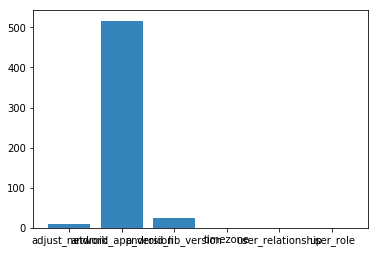

In [25]:
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
x_ps= np.arange(len(X2.columns))
for i in range(len(fs.scores_)):
    #print(catego.columns[i])
    print('Feature %d %s: %f' % (i,X2.columns[i], fs.scores_[i]))
#pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.bar(np.array(X2.columns[0:-1]), fs.scores_, width=0.8, align='center', alpha=0.9)

#fs.scores_
pyplot.show()

In [26]:
fss=list(fs.scores_)
nam= X2.columns[0:-1].tolist()
data = {'Feature':nam,
       'Score':fss}
data=pd.DataFrame(data)
data= data.sort_values(by = 'Score', ascending=False)
data= data.reset_index(drop=True)
data

Feature       Score
0  android_app_version  516.313528
1  android_lib_version   25.691959
2       adjust_network   10.538573
3             timezone    0.193851
4    user_relationship    0.039992
5            user_role    0.000106
6               device         NaN

In [27]:
#catego= data.Feature[0:2].tolist()
catego= data.Feature[3]


In [28]:
h2o.init(min_mem_size = 200)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ---------------------------------------------------
H2O cluster uptime:         11 mins 37 secs
H2O cluster timezone:       Etc/UTC
H2O data parsing timezone:  UTC
H2O cluster version:        3.26.0.1
H2O cluster version age:    1 year, 1 month and 25 days !!!
H2O cluster name:           H2O_from_python_unknownUser_2m1a4s
H2O cluster total nodes:    1
H2O cluster free memory:    200.0 Gb
H2O cluster total cores:    70
H2O cluster allowed cores:  70
H2O cluster status:         locked, healthy
H2O connection url:         http://localhost:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.5.6 final
--------------------------  ---------------------------------------------------

In [29]:
N= raw_data[feat]
C= raw_data[catego]
Y= raw_data['y']
df= pd.concat( [N, C, Y  ], axis = 1)

In [ ]:
#df= pd.concat( [N, C, Y  ], axis = 1)
#M = pd.concat( [N.reset_index(drop=True), C.reset_index(drop=True), Y.reset_index(drop=True)  ], axis = 1)
#df= pd.concat( [N, Y  ], axis = 1)


In [30]:
X_hf = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [31]:
train, test = X_hf.split_frame(ratios = [.7], seed=0)

In [32]:
 X_hf.describe()

Rows:2536
Cols:22




MenuHelp NPSSubmit MenuFamilyInvite S_SPLogin S_NPSScore DAPActivityCompleted dismissed ClickInDAP Dismiss_Feedback_RateActivity S_SearchEmptyState VideoPlayerActivity S_MenuFamilyProfile days_to_take_FT ArticleView S_DAPPastPlansPremium OpenApp SlideshowView Feedback_RateActivity ActivityView S_ProgressHome timezone y 
 
 
 type int int int int int int int int int int int int int int int int int int int int enum enum 
 mins 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 
 mean 0.10607255520504734 0.02602523659305994 0.21175078864353322 0.07728706624605677 0.05914826498422713 1.6044952681388025 0.0654574132492114 0.025630914826498423 0.054022082018927456 0.004337539432176656 2.9412460567823318 0.6478706624605676 0.04376971608832807 0.7287066246056768 0.3489747634069399 5.286277602523652 0.002365930599369085 0.44006309148264955 5.436119873817029 1.9238958990536263 
 maxs 12.0 7.0 15.0 10.0 7.0 70.0 7.0 4.0 14.0 4.0 194.0 46.0 3.0 49.0 22.0 84.0 4.0 30.0 144.0 108.0 
 sigma 0.5654296101579137 0.2196306154715446 0.7235922404048643 0.4835975208129168 0.3514566814219367 3.5209325437853596 0.36683736535898726 0.22057303042305712 0.3999994944589542 0.11049875643671997 10.659296868404645 2.1436156759789466 0.29999445196329155 2.090020446445357 1.140980811747108 5.137101096606196 0.08423177476604764 1.492240229760519 8.254283483516657 5.1939242273159465 
 zeros 2388 2483 2179 2444 2434 1559 2423 2493 2441 2531 2003 1794 2470 1830 2063 0 2533 2143 524 1370 
 missing 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 America/Los_Angeles Premium 
 1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 1.0 1.0 America/New_York Freemium 
 2 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 America/Los_Angeles Freemium 
 3 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 America/Chicago Freemium 
 4 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 0.0 6.0 0.0 2.0 9.0 11.0 America/Los_Angeles Premium 
 5 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 4.0 0.0 0.0 0.0 1.0 America/Los_Angeles Premium 
 6 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 6.0 0.0 4.0 9.0 0.0 America/Boise Freemium 
 7 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 10.0 4.0 America/Kentucky/Louisville Freemium 
 8 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 2.0 0.0 2.0 0.0 0.0 1.0 0.0 America/Los_Angeles Freemium 
 9 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 America/Los_Angeles Premium

In [33]:
feat= X_hf.columns[:-1]


In [ ]:
#feat= X_hf.columns[:-1]
feat

In [34]:
nam= ['CeliaUSOsFTgbm','CeliaUSOsFTDRF','CeliaUSOsFTGLM','CeliaUSOsFTXGB']
#feat.append('timezone')

#Var= ['language', 'mp_region', 'city', 'signup_provider', 'timezone', 'user_gender',
 #              'email_domain', 'adjust_network', 'baby_gender', 'weeks_before_birth', 
  #             'baby_age_at_signup_meses', 'edad_bebe_actual_meses']

gbm = H2OGradientBoostingEstimator(model_id = nam[0], seed = 0, balance_classes=True,  nfolds = 10)
gbm.train(  x= feat, y='y', training_frame=train)

DRF = H2ORandomForestEstimator(model_id = nam[1], seed = 0, balance_classes=True, binomial_double_trees=True,  nfolds = 10)
DRF.train(  x= feat, y='y', training_frame=train)

GLM = H2OGeneralizedLinearEstimator(model_id = nam[2], seed = 0,family = 'binomial',  nfolds = 10)
GLM.train(  x= feat, y='y', training_frame=train)

XGB = H2OXGBoostEstimator(model_id = nam[3], seed = 0,  nfolds = 10)
XGB.train(  x= feat, y='y', training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████| 100%
xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [35]:
m= ['gbm','DRF','GLM','XGB']
nam= ['CeliaUSOsFTgbm','CeliaUSOsFTDRF','CeliaUSOsFTGLM','CeliaUSOsFTXGB']

gbmf =  gbm.model_performance(test).confusion_matrix().to_list()
ger= gbmf[1][0]/(gbmf[1][0]+gbmf[1][1])

DRFf =  DRF.model_performance(test).confusion_matrix().to_list()
DRFer= DRFf[1][0]/(DRFf[1][0]+DRFf[1][1])

GLMf =  GLM.model_performance(test).confusion_matrix().to_list()
GLMer= GLMf[1][0]/(GLMf[1][0]+GLMf[1][1])

XGBf =  XGB.model_performance(test).confusion_matrix().to_list()
XGBer= XGBf[1][0]/(XGBf[1][0]+XGBf[1][1])

er= [ger,DRFer,GLMer,XGBer]
data = {'Model':nam,
       'Error':er}

data= pd.DataFrame(data)
data

Error           Model
0  0.041558  CeliaUSOsFTgbm
1  0.033766  CeliaUSOsFTDRF
2  0.028571  CeliaUSOsFTGLM
3  0.057143  CeliaUSOsFTXGB

In [36]:
gbm.model_performance(test).confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40786511715593443: 


Freemium    Premium    Error    Rate
--------  ----------  ---------  -------  -------------
Freemium  43          320        0.8815   (320.0/363.0)
Premium   16          369        0.0416   (16.0/385.0)
Total     59          689        0.4492   (336.0/748.0)

In [37]:
GLM.model_performance(test).confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4487753479127711: 


Freemium    Premium    Error    Rate
--------  ----------  ---------  -------  -------------
Freemium  43          320        0.8815   (320.0/363.0)
Premium   11          374        0.0286   (11.0/385.0)
Total     54          694        0.4425   (331.0/748.0)

In [38]:
DRF.model_performance(test).confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35907354820760284: 


Freemium    Premium    Error    Rate
--------  ----------  ---------  -------  -------------
Freemium  40          323        0.8898   (323.0/363.0)
Premium   13          372        0.0338   (13.0/385.0)
Total     53          695        0.4492   (336.0/748.0)

In [39]:
XGB.model_performance(test).confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32216858863830566: 


Freemium    Premium    Error    Rate
--------  ----------  ---------  -------  -------------
Freemium  61          302        0.832    (302.0/363.0)
Premium   22          363        0.0571   (22.0/385.0)
Total     83          665        0.4332   (324.0/748.0)

In [40]:
feat

['MenuHelp',
 'NPSSubmit',
 'MenuFamilyInvite',
 'S_SPLogin',
 'S_NPSScore',
 'DAPActivityCompleted',
 'dismissed',
 'ClickInDAP',
 'Dismiss_Feedback_RateActivity',
 'S_SearchEmptyState',
 'VideoPlayerActivity',
 'S_MenuFamilyProfile',
 'days_to_take_FT',
 'ArticleView',
 'S_DAPPastPlansPremium',
 'OpenApp',
 'SlideshowView',
 'Feedback_RateActivity',
 'ActivityView',
 'S_ProgressHome',
 'timezone']

In [41]:
n1 = list(np.arange(50, 500, 110 ))
n2 =  list(np.arange(20, 242, 120))
params = { 'ntrees': n1, 'max_depth' : n2 }
#XGB = H2OXGBoostEstimator(model_id = "BR", seed = 0,  nfolds = 10)
RF = H2ORandomForestEstimator(model_id = "CeliaUSOsFTDRF", seed = 0, balance_classes=True, binomial_double_trees=True,  nfolds = 10)

#gbm = H2OGradientBoostingEstimator(model_id = "USgbm", seed = 0, balance_classes=True,  nfolds = 10)
grid = H2OGridSearch(model=RF, hyper_params=params)
params 


{'max_depth': [20, 140], 'ntrees': [50, 160, 270, 380, 490]}

In [42]:
grid.train(x=feat, y= 'y', training_frame = train , validation_frame=test)

drf Grid Build progress: |████████████████████████████████████████████████| 100%


In [43]:
grid.accuracy

    max_depth ntrees  \
0          20    270   
1          20    160   
2          20    380   
3          20    490   
4          20     50   
5         140    490   
6         140    270   
7         140    380   
8         140    160   
9         140     50   

                                                         model_ids  \
0   Grid_DRF_py_3_sid_ba7b_model_python_1599762175520_2762_model_5   
1   Grid_DRF_py_3_sid_ba7b_model_python_1599762175520_2762_model_3   
2   Grid_DRF_py_3_sid_ba7b_model_python_1599762175520_2762_model_7   
3   Grid_DRF_py_3_sid_ba7b_model_python_1599762175520_2762_model_9   
4   Grid_DRF_py_3_sid_ba7b_model_python_1599762175520_2762_model_1   
5  Grid_DRF_py_3_sid_ba7b_model_python_1599762175520_2762_model_10   
6   Grid_DRF_py_3_sid_ba7b_model_python_1599762175520_2762_model_6   
7   Grid_DRF_py_3_sid_ba7b_model_python_1599762175520_2762_model_8   
8   Grid_DRF_py_3_sid_ba7b_model_python_1599762175520_2762_model_4   
9   Grid_DRF_py_3_sid_ba7b_model_py

<bound method H2OBinomialGridSearch.accuracy of >

In [44]:
grid_train = grid.get_grid(sort_by='recall', decreasing=True )
grid_train 

    max_depth ntrees  \
0         140    160   
1         140    490   
2         140    380   
3          20     50   
4         140    270   
5         140     50   
6          20    490   
7          20    160   
8          20    270   
9          20    380   

                                                         model_ids  \
0   Grid_DRF_py_3_sid_ba7b_model_python_1599762175520_2762_model_4   
1  Grid_DRF_py_3_sid_ba7b_model_python_1599762175520_2762_model_10   
2   Grid_DRF_py_3_sid_ba7b_model_python_1599762175520_2762_model_8   
3   Grid_DRF_py_3_sid_ba7b_model_python_1599762175520_2762_model_1   
4   Grid_DRF_py_3_sid_ba7b_model_python_1599762175520_2762_model_6   
5   Grid_DRF_py_3_sid_ba7b_model_python_1599762175520_2762_model_2   
6   Grid_DRF_py_3_sid_ba7b_model_python_1599762175520_2762_model_9   
7   Grid_DRF_py_3_sid_ba7b_model_python_1599762175520_2762_model_3   
8   Grid_DRF_py_3_sid_ba7b_model_python_1599762175520_2762_model_5   
9   Grid_DRF_py_3_sid_ba7b_model_py

In [45]:
path='/home/celia/fbfakeevents/Conversion/BehaviorMixpanel/Models/aOS/US/FT'

g = grid_train
print(g.grid_id)
print(g)
for i, m in enumerate(g.models):
    print("Save model" + m.model_id + " to " + path + "/" + m.model_id)
    h2o.save_model(model=m, path=path, force=True)

Grid_DRF_py_3_sid_ba7b_model_python_1599762175520_2762
    max_depth ntrees  \
0         140    160   
1         140    490   
2         140    380   
3          20     50   
4         140    270   
5         140     50   
6          20    490   
7          20    160   
8          20    270   
9          20    380   

                                                         model_ids  \
0   Grid_DRF_py_3_sid_ba7b_model_python_1599762175520_2762_model_4   
1  Grid_DRF_py_3_sid_ba7b_model_python_1599762175520_2762_model_10   
2   Grid_DRF_py_3_sid_ba7b_model_python_1599762175520_2762_model_8   
3   Grid_DRF_py_3_sid_ba7b_model_python_1599762175520_2762_model_1   
4   Grid_DRF_py_3_sid_ba7b_model_python_1599762175520_2762_model_6   
5   Grid_DRF_py_3_sid_ba7b_model_python_1599762175520_2762_model_2   
6   Grid_DRF_py_3_sid_ba7b_model_python_1599762175520_2762_model_9   
7   Grid_DRF_py_3_sid_ba7b_model_python_1599762175520_2762_model_3   
8   Grid_DRF_py_3_sid_ba7b_model_python_1599762175

In [ ]:
#import os
#os.remove("ChangedFile.csv")
#print("File Removed!")
#Para borrar entrenados que no sirven 

In [46]:
## model = grid_train.models[0]
model =  h2o.load_model(path+ '/'+ 'Grid_DRF_py_3_sid_ba7b_model_python_1599762175520_2762_model_7')
#model

In [47]:
model.model_performance(test)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.240860822040478
RMSE: 0.49077573497523086
LogLoss: 0.6763494523451677
Mean Per-Class Error: 0.40389610389610386
AUC: 0.6256448785374404
pr_auc: 0.622669601126487
Gini: 0.2512897570748809
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38480593500929805: 


Freemium    Premium    Error    Rate
--------  ----------  ---------  -------  -------------
Freemium  42          321        0.8843   (321.0/363.0)
Premium   12          373        0.0312   (12.0/385.0)
Total     54          694        0.4452   (333.0/748.0)

Maximum Metrics: Maximum metrics at their respective thresholds



metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.384806     0.691381  350
max f2                       0.216547     0.845443  382
max f0point5                 0.495944     0.61396   265
max accuracy                 0.496563     0.600267  264
max precision                0.847281     0.785714  23
max recall                   0.179465     1         388
max specificity              0.936076     0.997245  0
max absolute_mcc             0.495944     0.200851  265
max min_per_class_accuracy   0.539854     0.58961   226
max mean_per_class_accuracy  0.496563     0.596104  264

Gains/Lift Table: Avg response rate: 51.47 %, avg score: 56.67 %



group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain
--  -------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------
    1        0.0106952                   0.886667           1.21429   1.21429            0.625            0.909072  0.625                       0.909072            0.012987        0.012987                   21.4286   21.4286
    2        0.0200535                   0.870717           1.38776   1.29524            0.714286         0.878733  0.666667                    0.894914            0.012987        0.025974                   38.7755   29.5238
    3        0.0307487                   0.851098           1.7       1.43602            0.875            0.862926  0.73913                     0.883788            0.0181818       0.0441558                  70        43.6025
    4        0.040107                    0.841825           1.66531   1.48952            0.857143         0.847167  0.766667                    0.875243            0.0155844       0.0597403                  66.5306   48.9524
    5        0.0508021                   0.83279            1.45714   1.48271            0.75             0.836984  0.763158                    0.867188            0.0155844       0.0753247                  45.7143   48.2707
    6        0.100267                    0.772968           1.26023   1.37295            0.648649         0.803847  0.706667                    0.83594             0.0623377       0.137662                   26.0232   37.2952
    7        0.15107                     0.737965           1.22707   1.32389            0.631579         0.756602  0.681416                    0.80926             0.0623377       0.2                        22.7068   32.3894
    8        0.200535                    0.704936           1.15521   1.28229            0.594595         0.72303   0.66                        0.78799             0.0571429       0.257143                   15.5212   28.2286
    9        0.300802                    0.645938           1.21752   1.2607             0.626667         0.676009  0.648889                    0.750663            0.122078        0.379221                   21.7524   26.0698
    10       0.399733                    0.591002           1.1027    1.2216             0.567568         0.615518  0.628763                    0.717216            0.109091        0.488312                   10.2703   22.1596
    11       0.5                         0.539812           1.01029   1.17922            0.52             0.561434  0.606952                    0.685976            0.101299        0.58961                    1.02857   17.9221
    12       0.601604                    0.507974           0.920301  1.13549            0.473684         0.521842  0.584444                    0.658256            0.0935065       0.683117                   -7.96992  13.5492
    13       0.703209                    0.487759           0.843609  1.09332            0.434211         0.497134  0.562738                    0.634976            0.0857143       0.768831                   -15.6391  9.33188
    14       0.799465                    0.461296           0.944444  1.07539            0.486111         0.473784  0.553512                    0.615568            0.0909091       0.85974                    -5.55556  7.53942
    15       0.899733                    0.415737           0.777143  1.04216            0.4              0.443386  0.536404                    0.59638             0.0779221       0.937662                   -22.2857  4.21567
    16       1                           0.0474555          0.621714  1                  0.32             0.300427  0.514706                    0.566705         

In [48]:
model.accuracy()


[[0.5027100290474055, 0.6549039958484691]]

In [53]:
model.confusion_matrix

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  Grid_DRF_py_3_sid_ba7b_model_python_1599762175520_2762_model_7

Model Summary: 


number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    380                760                         2.79872e+06            20           20           20            149           390           265.195



ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.22030892838996735
RMSE: 0.469370779224663
LogLoss: 0.6313885334014244
Mean Per-Class Error: 0.34515761034663295
AUC: 0.7003895284077811
pr_auc: 0.6546474940187442
Gini: 0.40077905681556225
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41653488066239536: 


Freemium    Premium    Error    Rate
--------  ----------  ---------  -------  --------------
Freemium  319         639        0.667    (639.0/958.0)
Premium   76          893        0.0784   (76.0/969.0)
Total     395         1532       0.371    (715.0/1927.0)

Maximum Metrics: Maximum metrics at their respective thresholds



metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.416535     0.714114  272
max f2                       0.351046     0.843699  303
max f0point5                 0.524325     0.657985  188
max accuracy                 0.50271      0.654904  204
max precision                0.942739     1         0
max recall                   0.0396965    1         390
max specificity              0.942739     1         0
max absolute_mcc             0.416535     0.31528   272
max min_per_class_accuracy   0.504683     0.649123  202
max mean_per_class_accuracy  0.50271      0.654842  204

Gains/Lift Table: Avg response rate: 50.29 %, avg score: 52.18 %



group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain
--  -------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------
    1        0.0103788                   0.87837            1.29262   1.29262            0.65             0.899382  0.65                        0.899382            0.0134159       0.0134159                  29.2621   29.2621
    2        0.0202387                   0.850733           1.67465   1.47874            0.842105         0.864657  0.74359                     0.882465            0.0165119       0.0299278                  67.4651   47.8738
    3        0.0300986                   0.829386           1.25599   1.40577            0.631579         0.839167  0.706897                    0.868281            0.0123839       0.0423117                  25.5988   40.5768
    4        0.0404774                   0.818697           1.19319   1.35126            0.6              0.824061  0.679487                    0.856942            0.0123839       0.0546956                  19.3189   35.1261
    5        0.0503373                   0.802379           1.56999   1.3941             0.789474         0.810147  0.701031                    0.847776            0.0154799       0.0701754                  56.9985   39.4104
    6        0.100156                    0.746455           1.3672    1.38072            0.6875           0.773155  0.694301                    0.810659            0.0681115       0.138287                   36.7196   38.0719
    7        0.149974                    0.705701           1.30505   1.35558            0.65625          0.72601   0.681661                    0.782541            0.0650155       0.203302                   30.505    35.5584
    8        0.200311                    0.671167           1.49661   1.39102            0.752577         0.687834  0.699482                    0.758741            0.0753354       0.278638                   49.6611   39.1023
    9        0.299948                    0.594582           1.4397    1.40719            0.723958         0.631587  0.707612                    0.716503            0.143447        0.422085                   43.9698   40.7192
    10       0.400104                    0.540739           1.24677   1.36703            0.626943         0.564972  0.687419                    0.678571            0.124871        0.546956                   24.6769   36.7034
    11       0.500259                    0.504403           1.02008   1.29757            0.512953         0.521189  0.65249                     0.647062            0.102167        0.649123                   2.00837   29.7572
    12       0.599896                    0.487345           0.901106  1.23172            0.453125         0.49566   0.619377                    0.621916            0.0897833       0.738906                   -9.88938  23.1723
    13       0.700052                    0.463747           0.772791  1.16606            0.388601         0.475111  0.58636                     0.600912            0.0773994       0.816305                   -22.7209  16.6064
    14       0.799689                    0.412313           1.06683   1.1537             0.536458         0.44273   0.580143                    0.581204            0.106295        0.922601                   6.68268   15.37
    15       0.899844                    0.31452            0.515194  1.08263            0.259067         0.367587  0.544406                    0.557428            0.0515996       0.9742                     -48.4806  8.26319
    16       1                           0.00433983         0.257597  1                  0.129534         0.20176   0.502854                    0.521805           



ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.240860822040478
RMSE: 0.49077573497523086
LogLoss: 0.6763494523451677
Mean Per-Class Error: 0.40389610389610386
AUC: 0.6256448785374404
pr_auc: 0.622669601126487
Gini: 0.2512897570748809
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38480593500929805: 


Freemium    Premium    Error    Rate
--------  ----------  ---------  -------  -------------
Freemium  42          321        0.8843   (321.0/363.0)
Premium   12          373        0.0312   (12.0/385.0)
Total     54          694        0.4452   (333.0/748.0)

Maximum Metrics: Maximum metrics at their respective thresholds



metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.384806     0.691381  350
max f2                       0.216547     0.845443  382
max f0point5                 0.495944     0.61396   265
max accuracy                 0.496563     0.600267  264
max precision                0.847281     0.785714  23
max recall                   0.179465     1         388
max specificity              0.936076     0.997245  0
max absolute_mcc             0.495944     0.200851  265
max min_per_class_accuracy   0.539854     0.58961   226
max mean_per_class_accuracy  0.496563     0.596104  264

Gains/Lift Table: Avg response rate: 51.47 %, avg score: 56.67 %



group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain
--  -------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------
    1        0.0106952                   0.886667           1.21429   1.21429            0.625            0.909072  0.625                       0.909072            0.012987        0.012987                   21.4286   21.4286
    2        0.0200535                   0.870717           1.38776   1.29524            0.714286         0.878733  0.666667                    0.894914            0.012987        0.025974                   38.7755   29.5238
    3        0.0307487                   0.851098           1.7       1.43602            0.875            0.862926  0.73913                     0.883788            0.0181818       0.0441558                  70        43.6025
    4        0.040107                    0.841825           1.66531   1.48952            0.857143         0.847167  0.766667                    0.875243            0.0155844       0.0597403                  66.5306   48.9524
    5        0.0508021                   0.83279            1.45714   1.48271            0.75             0.836984  0.763158                    0.867188            0.0155844       0.0753247                  45.7143   48.2707
    6        0.100267                    0.772968           1.26023   1.37295            0.648649         0.803847  0.706667                    0.83594             0.0623377       0.137662                   26.0232   37.2952
    7        0.15107                     0.737965           1.22707   1.32389            0.631579         0.756602  0.681416                    0.80926             0.0623377       0.2                        22.7068   32.3894
    8        0.200535                    0.704936           1.15521   1.28229            0.594595         0.72303   0.66                        0.78799             0.0571429       0.257143                   15.5212   28.2286
    9        0.300802                    0.645938           1.21752   1.2607             0.626667         0.676009  0.648889                    0.750663            0.122078        0.379221                   21.7524   26.0698
    10       0.399733                    0.591002           1.1027    1.2216             0.567568         0.615518  0.628763                    0.717216            0.109091        0.488312                   10.2703   22.1596
    11       0.5                         0.539812           1.01029   1.17922            0.52             0.561434  0.606952                    0.685976            0.101299        0.58961                    1.02857   17.9221
    12       0.601604                    0.507974           0.920301  1.13549            0.473684         0.521842  0.584444                    0.658256            0.0935065       0.683117                   -7.96992  13.5492
    13       0.703209                    0.487759           0.843609  1.09332            0.434211         0.497134  0.562738                    0.634976            0.0857143       0.768831                   -15.6391  9.33188
    14       0.799465                    0.461296           0.944444  1.07539            0.486111         0.473784  0.553512                    0.615568            0.0909091       0.85974                    -5.55556  7.53942
    15       0.899733                    0.415737           0.777143  1.04216            0.4              0.443386  0.536404                    0.59638             0.0779221       0.937662                   -22.2857  4.21567
    16       1                           0.0474555          0.621714  1                  0.32             0.300427  0.514706                    0.566705         



ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.24207959130277396
RMSE: 0.4920158445647599
LogLoss: 0.678524851293115
Mean Per-Class Error: 0.4168301598642157
AUC: 0.6040427867053254
pr_auc: 0.6186013390169073
Gini: 0.20808557341065081
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3628440483852214: 


Freemium    Premium    Error    Rate
--------  ----------  ---------  -------  --------------
Freemium  109         710        0.8669   (710.0/819.0)
Premium   39          930        0.0402   (39.0/969.0)
Total     148         1640       0.4189   (749.0/1788.0)

Maximum Metrics: Maximum metrics at their respective thresholds



metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.362844     0.712917  318
max f2                       0.164606     0.85925   372
max f0point5                 0.495155     0.621657  231
max accuracy                 0.495155     0.589485  231
max precision                0.960468     1         0
max recall                   0.0661004    1         388
max specificity              0.960468     1         0
max absolute_mcc             0.36421      0.168212  317
max min_per_class_accuracy   0.530489     0.573871  203
max mean_per_class_accuracy  0.564244     0.58317   179

Gains/Lift Table: Avg response rate: 54.19 %, avg score: 55.05 %



group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain
--  -------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------
    1        0.0100671                   0.87686            1.33265   1.33265            0.722222         0.896429  0.722222                    0.896429            0.0134159       0.0134159                  33.2645   33.2645
    2        0.0201342                   0.847636           1.23013   1.28139            0.666667         0.861371  0.694444                    0.8789              0.0123839       0.0257998                  23.0134   28.139
    3        0.0302013                   0.828474           1.12762   1.23013            0.611111         0.838186  0.666667                    0.865329            0.0113519       0.0371517                  12.7623   23.0134
    4        0.0402685                   0.815924           0.922601  1.15325            0.5              0.822945  0.625                       0.854733            0.00928793      0.0464396                  -7.73994  15.3251
    5        0.0503356                   0.806696           1.64018   1.25064            0.888889         0.810624  0.677778                    0.845911            0.0165119       0.0629515                  64.0179   25.0636
    6        0.100112                    0.759984           1.11956   1.18546            0.606742         0.784091  0.642458                    0.815174            0.0557276       0.118679                   11.956    18.5464
    7        0.150447                    0.723234           1.08662   1.15239            0.588889         0.742695  0.624535                    0.790925            0.0546956       0.173375                   8.66185   15.2393
    8        0.200224                    0.6882             1.20249   1.16485            0.651685         0.70479   0.631285                    0.769511            0.0598555       0.23323                    20.2491   16.4848
    9        0.300336                    0.628652           1.21639   1.18203            0.659218         0.657195  0.640596                    0.732073            0.121775        0.355005                   21.639    18.2028
    10       0.399888                    0.577381           1.19212   1.18454            0.646067         0.601338  0.641958                    0.699526            0.118679        0.473684                   19.2124   18.4542
    11       0.501678                    0.531838           0.953016  1.13757            0.516484         0.553061  0.616499                    0.669809            0.0970072       0.570691                   -4.6984   13.7566
    12       0.60123                     0.49897            1.05736   1.12429            0.573034         0.513391  0.609302                    0.643909            0.105263        0.675955                   5.73625   12.4285
    13       0.700783                    0.480157           0.808571  1.07944            0.438202         0.488789  0.584996                    0.621873            0.0804954       0.75645                    -19.1429  7.94354
    14       0.799776                    0.450609           0.948663  1.06325            0.514124         0.466266  0.576224                    0.602612            0.0939112       0.850361                   -5.13372  6.32488
    15       0.899888                    0.379564           0.917446  1.04703            0.497207         0.420652  0.567433                    0.582369            0.0918473       0.942208                   -8.25536  4.70284
    16       1                           0.0188479          0.57727   1                  0.312849         0.263883  0.541946                    0.550485          


Cross-Validation Metrics Summary: 


mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.591468   0.0239752   0.539773      0.517588      0.611702      0.635838      0.607955      0.608696      0.597484      0.596591      0.588889      0.61017
auc                      0.606616   0.0247134   0.57009       0.563765      0.589074      0.62483       0.680981      0.619846      0.649106      0.58809       0.592611      0.587765
err                      0.408532   0.0239752   0.460227      0.482412      0.388298      0.364162      0.392045      0.391304      0.402516      0.403409      0.411111      0.389831
err_count                73.2       6.37024     81            96            73            63            69            72            64            71            74            69
f0point5                 0.623939   0.0240697   0.567867      0.552969      0.646917      0.663265      0.630081      0.63249       0.629575      0.623229      0.637255      0.655738
f1                       0.720668   0.0204313   0.669388      0.664336      0.745645      0.742857      0.729412      0.725191      0.728814      0.712551      0.737589      0.750903
f2                       0.853748   0.0151729   0.815109      0.831874      0.879934      0.844156      0.865922      0.849732      0.865191      0.831758      0.875421      0.878378
lift_top_group           1.46723    0.444127    2.04651       0             0.878505      1.76531       1.87234       1.85859       1.82759       1.87234       0.865385      1.68571
logloss                  0.677715   0.0186834   0.716585      0.718013      0.680626      0.659398      0.630796      0.673512      0.652585      0.692813      0.690917      0.661909
max_per_class_error      0.864161   0.0488498   0.855556      0.923077      0.901235      0.746667      0.829268      0.8           0.875         0.792683      0.973684      0.944444
mcc                      0.20977    0.0358587   0.16572       0.195602      0.242303      0.252256      0.286013      0.250234      0.232729      0.212361      0.123998      0.13648
mean_per_class_accuracy  0.555228   0.0172235   0.548966      0.538462      0.549383      0.590952      0.580047      0.579798      0.556753      0.571744      0.513158      0.523016
mean_per_class_error     0.444772   0.0172235   0.451034      0.461538      0.450617      0.409048      0.419953      0.420202      0.443247      0.428256      0.486842      0.476984
mse                      0.241738   0.00792998  0.258338      0.259134      0.242567      0.23374       0.221871      0.239698      0.23111       0.248884      0.24607       0.235973
precision                0.572832   0.0253452   0.515723      0.497382      0.594444      0.619048      0.57764       0.582822      0.577181      0.575163      0.58427       0.604651
r2                       0.0210983  0.0306061   -0.0338858    -0.0386592    0.0108135     0.0482173     0.10837       0.0356244     0.0672576     -0.000186439  -0.00868645   0.0221178
recall                   0.974617   0.0185272   0.953488      1             1             0.928571      0.989362      0.959596      0.988506      0.93617       1             0.990476
rmse                     0.491537   0.00806623  0.50827       0.509052      0.492511      0.483467      0.471032      0.48959       0.480739      0.498883      0.496054      0.48577
specificity              0.135839   0.0488498   0.144444      0.0769231     0.0987654     0.253333      0.170732      0.2           0.125         0.207317      0.0263158     0.0555556

Scoring History: 


timestamp            duration          number_of_trees    training_rmse        training_logloss    training_auc        training_pr_auc      training_lift       training_classification_error    validation_rmse      validation_logloss    validation_auc      validation_pr_auc    validation_lift     validation_classification_error
---  -------------------  ----------------  -----------------  -------------------  ------------------  ------------------  -------------------  ------------------  -------------------------------  -------------------  --------------------  ------------------  -------------------  ------------------  ---------------------------------
     2020-09-10 18:43:23  1 min 53.114 sec  0.0                nan                  nan                 nan                 nan                  nan                 nan                              nan                  nan                   nan                 nan                  nan                 nan
     2020-09-10 18:43:23  1 min 53.138 sec  1.0                0.5920990070910028   7.583192833929804   0.5747784459566387  0.4054364473457052   1.1855402079860282  0.5007032348804501               0.6072111594107699   7.894667210747103     0.536631963078244   0.36863466607478895  1.2363636363636366  0.4852941176470588
     2020-09-10 18:43:23  1 min 53.155 sec  2.0                0.5900179026148877   7.301173206606779   0.5703401060070672  0.4051609482148827   1.1422400191046405  0.5112262521588946               0.544102577537926    4.216159802133141     0.58370720188902    0.4341182516701416   1.2906122448979593  0.4852941176470588
     2020-09-10 18:43:23  1 min 53.171 sec  3.0                0.5775562555404111   6.576881233314059   0.5778817644489286  0.4149668624049032   1.1403436604674995  0.5121612230715775               0.5237174705019476   2.841331771525284     0.5982970197846231  0.4692257123971187   1.3246753246753247  0.4852941176470588
     2020-09-10 18:43:23  1 min 53.188 sec  4.0                0.5601219448286625   5.434945976745512   0.5893324376470443  0.44552490699158576  1.2034623132609035  0.5040247678018576               0.5106759078492056   1.4858294569768147    0.5985009480877249  0.5071261881489478   1.5714285714285716  0.47058823529411764
---  ---                  ---               ---                ---                  ---                 ---                 ---                  ---                 ---                              ---                  ---                   ---                 ---                  ---                 ---
     2020-09-10 18:43:26  1 min 56.906 sec  76.0               0.47240878090136457  0.6385348877462325  0.6875197942049031  0.6532769064739932   1.491486068111455   0.38816813700051894              0.49251013166967506  0.6814486684853053    0.6198597545704984  0.6175585693336011   1.2142857142857144  0.45989304812834225
     2020-09-10 18:43:26  1 min 56.986 sec  77.0               0.4723811657644757   0.6384760467548742  0.6877777921409196  0.6541808839102481   1.491486068111455   0.38920601971977165              0.4922055291820483   0.680549945398761     0.6201245035955779  0.6193191036378376   1.2142857142857144  0.4585561497326203
     2020-09-10 18:43:26  1 min 57.064 sec  78.0               0.47219259497976634  0.6377995678105431  0.6877794079943812  0.6551932860533092   1.491486068111455   0.39387649195640895              0.4921419928032899   0.6803907683741144    0.6201674358699152  0.6189668716119495   1.2142857142857144  0.4585561497326203
     2020-09-10 18:43:30  2 min  1.074 sec  374.0              0.469429072656062    0.6314326739182373  0.7000658190976643  0.6552891206656474   1.3920536635706913  0.3720809548521017               0.4908954027334934   0.676635082032327     0.6249221852527638  0.6218265101029989   1.2142857142857144  0.4451871657754011
     2020-09-10 18:43:31  2 min  1.518 sec  380.0              0.469370779224663    0.6313885334014244  0.7003895284077811  0.6546474940187442   1.292621


See the whole table with table.as_data_frame()
Variable Importances: 


variable              relative_importance    scaled_importance      percentage
--------------------  ---------------------  ---------------------  ---------------------
timezone              21966.173828125        1.0                    0.16820216204788754
ActivityView          17446.939453125        0.7942639255083345     0.13359690950714415
OpenApp               14476.923828125        0.6590553248553951     0.11085453054985034
DAPActivityCompleted  11010.3896484375       0.5012429444740186     0.08431014697177917
S_ProgressHome        10847.5283203125       0.4938287571239906     0.08306306462967637
---                   ---                    ---                    ---
days_to_take_FT       1269.203857421875      0.05777992413939721    0.00971870816320954
ClickInDAP            796.5586547851562      0.036262967825796785   0.006099509590572003
NPSSubmit             531.0470581054688      0.024175674027742053   0.004066400640431175
SlideshowView         131.90904235839844     0.0060050987209026374  0.0010100705881668278
S_SearchEmptyState    85.01563262939453      0.003870297726613745   0.0006509924453854559


See the whole table with table.as_data_frame()


<bound method H2OBinomialModel.confusion_matrix of >

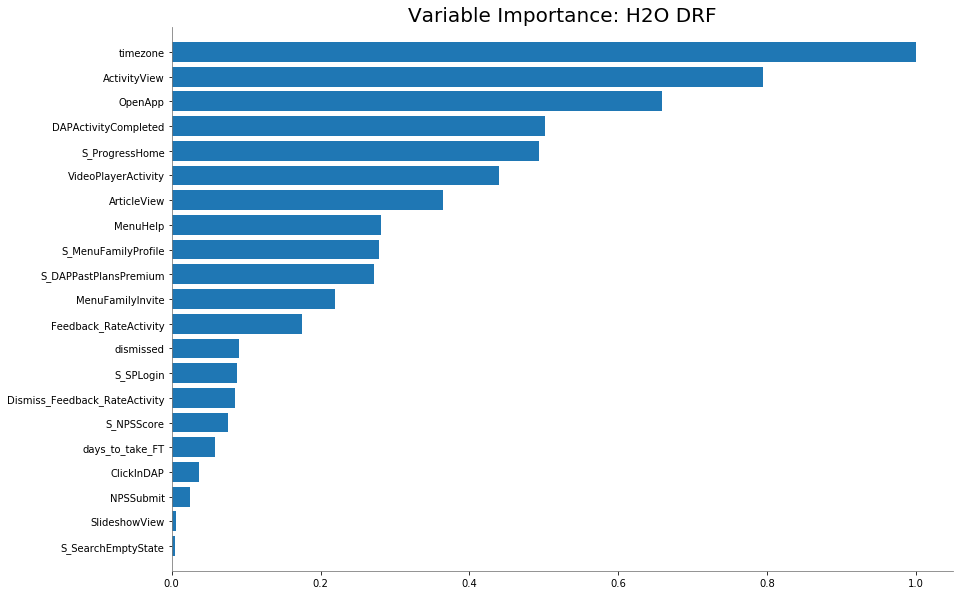

In [54]:
model.varimp_plot(num_of_features=55)

In [55]:
roc = model.model_performance(test_data=test, train=train)